# Instructions

You are provided with a breast cancer dataset (Breast_Cancer_Data.csv) taken originally from the UCI data repository.  https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original).

This dataset has approximately 683 patient data having 10 features and 1 class label describing whether the patient has cancer or not. Each row describes one patient, and the class column describes if the patient tumor is benign (label = 2) or malignant (label = 4). For this dataset, build all the classification models (using Python and Scikit-learn) given below (no need to visualize) and tabulate the accuracy and confusion matrix obtained for each. Split the dataset such that the test data size is 25% of the total dataset.

Make sure to code each classification model in a separate Python file. Then, you can tabulate the accuracy and confusion matrix in a Word document table. Finally, submit all the Python files and Word documents.
 a. Logistic Regression
 b. KNN (k = 5)
 c. Linear SVM (kernel = linear)
 d. Kernel SVM (kernel = rbf)
 e. Naïve Bayes
 f. Decision Tree
 g. Random Forest (estimators = 10)
 f. XGBoost

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df=pd.read_csv("breast-cancer-wisconsin-data1.csv", na_values=['NULL', '?', 'NONE', ' '])

print("Shape of dataset:",df.shape)

# Check for missing values
missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100
print(pd.DataFrame({'Data Type:': df.dtypes,'missing': missing_values, 'pc_missing': percentage_missing.round(2)}))

Shape of dataset: (699, 11)
                      Data Type:  missing  pc_missing
ID                         int64        0        0.00
clump_thickness            int64        0        0.00
uniformity_cell_size       int64        0        0.00
uniformity_cell_shape      int64        0        0.00
marginal_adhesion          int64        0        0.00
single_epi_cell_size       int64        0        0.00
bare_nuclei              float64       16        2.29
bland_chromatin            int64        0        0.00
normal_nucleoli            int64        0        0.00
mitoses                    int64        0        0.00
class                      int64        0        0.00


In [3]:
# Impute missing values with the mean
mean_impute_columns = ['bare_nuclei']
for column in mean_impute_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

print(f"Dataset shape:",df.shape)
    
# Print the missing values summary after imputation
missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100
print(pd.DataFrame({'Data Type:': df.dtypes,'missing': missing_values, 'pc_missing': percentage_missing.round(2)}))

Dataset shape: (699, 11)
                      Data Type:  missing  pc_missing
ID                         int64        0         0.0
clump_thickness            int64        0         0.0
uniformity_cell_size       int64        0         0.0
uniformity_cell_shape      int64        0         0.0
marginal_adhesion          int64        0         0.0
single_epi_cell_size       int64        0         0.0
bare_nuclei              float64        0         0.0
bland_chromatin            int64        0         0.0
normal_nucleoli            int64        0         0.0
mitoses                    int64        0         0.0
class                      int64        0         0.0


In [4]:
print("First 10 lines of dataset:")
df.head(10)

First 10 lines of dataset:


,ID,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [5]:
# List non catagorical (numeric) features along with their statistical description.
# Try to learn about the features by observing their statistical characteristics.  
df.select_dtypes(exclude=['object']).describe().round(decimals=2)  # May try without transpose() function

,ID,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00
mean,1071704.10,4.42,3.13,3.21,2.81,3.22,3.54,3.44,2.87,1.59,2.69
std,617095.73,2.82,3.05,2.97,2.86,2.21,3.60,2.44,3.05,1.72,0.95
min,61634.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,870688.50,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,1171710.00,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00
75%,1238298.00,6.00,5.00,5.00,4.00,4.00,5.00,5.00,4.00,1.00,4.00
max,13454352.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


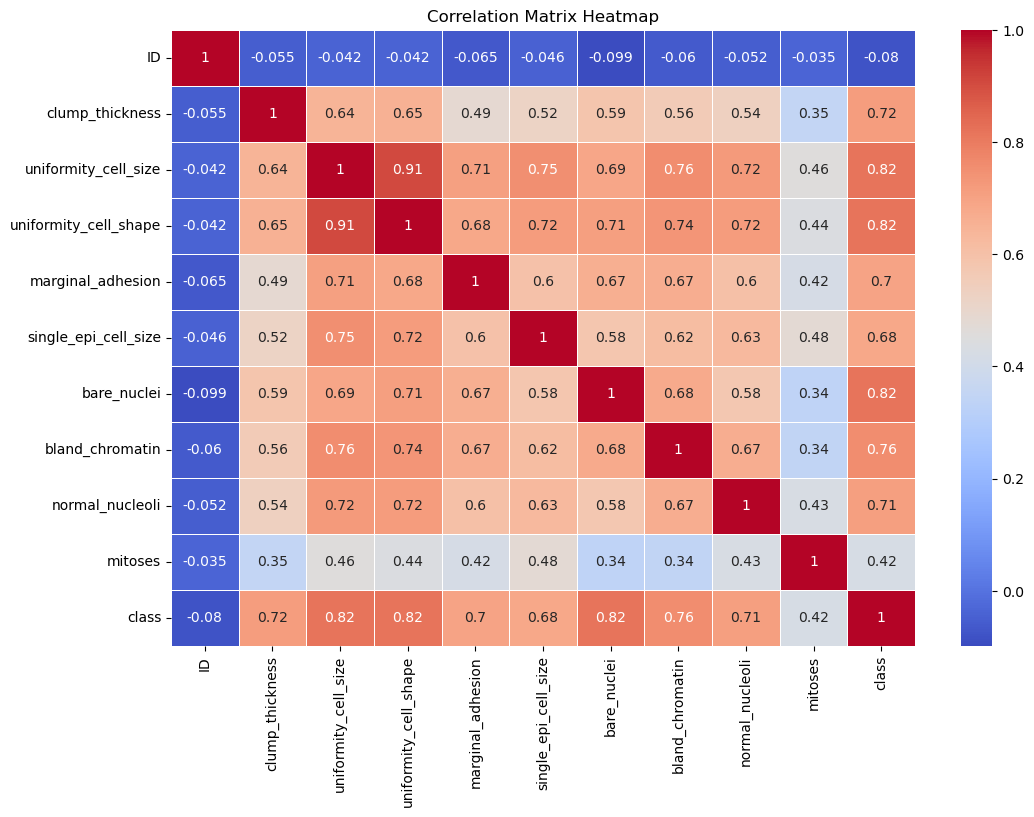

In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add plot title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()


In [7]:
df_cleaned = df.drop('ID', axis=1)
df_cleaned.columns

Index(['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape',
       'marginal_adhesion', 'single_epi_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [8]:
df_cleaned.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


array([[<Axes: title={'center': 'clump_thickness'}>,
        <Axes: title={'center': 'uniformity_cell_size'}>,
        <Axes: title={'center': 'uniformity_cell_shape'}>],
       [<Axes: title={'center': 'marginal_adhesion'}>,
        <Axes: title={'center': 'single_epi_cell_size'}>,
        <Axes: title={'center': 'bare_nuclei'}>],
       [<Axes: title={'center': 'bland_chromatin'}>,
        <Axes: title={'center': 'normal_nucleoli'}>,
        <Axes: title={'center': 'mitoses'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

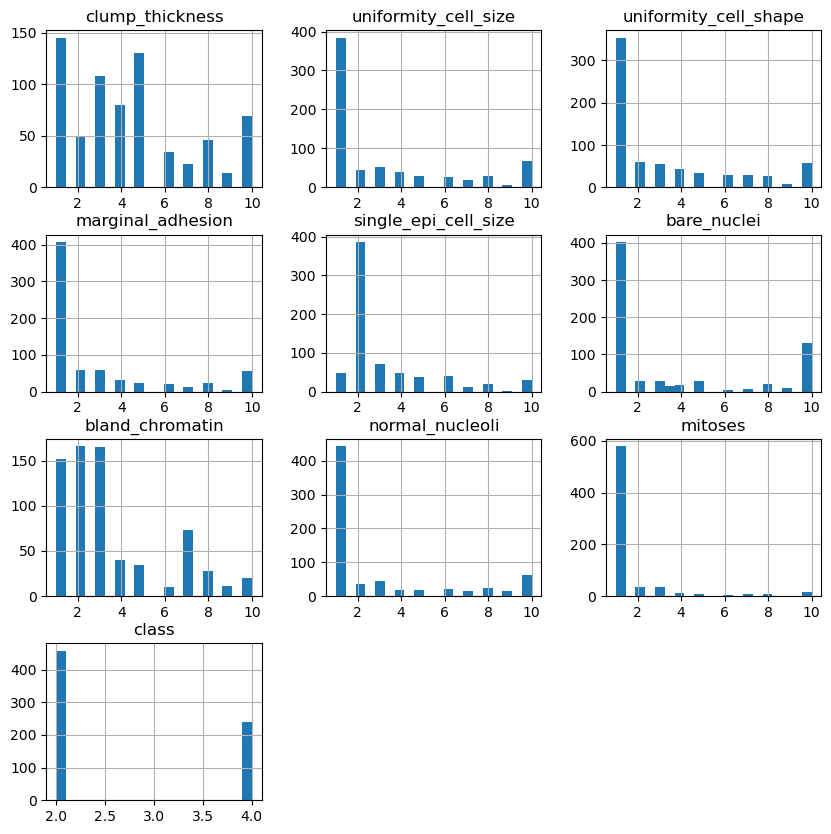

In [9]:
df_cleaned.hist(bins=20, figsize=(10, 10)) 

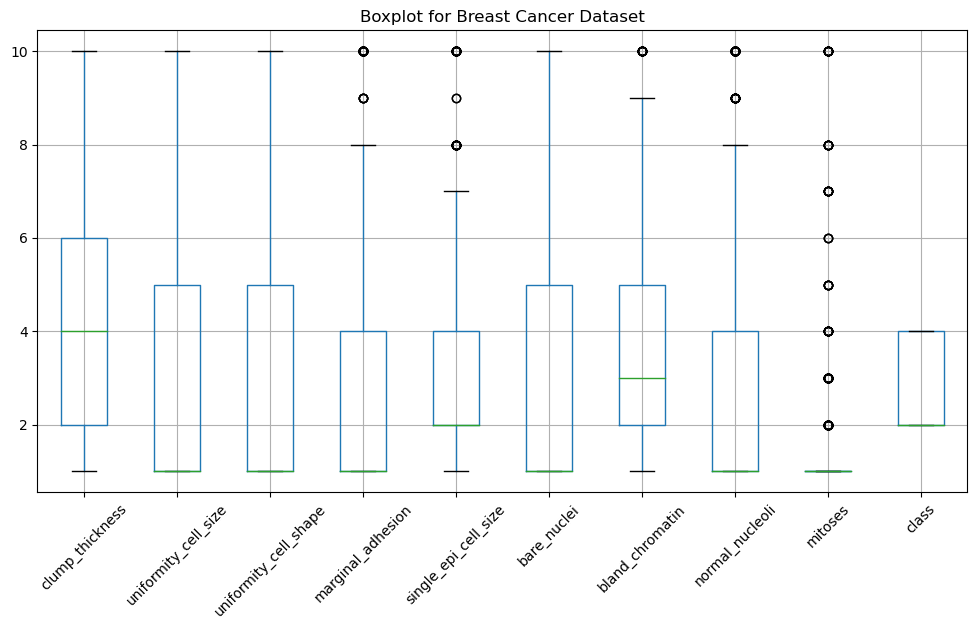

In [10]:
# Boxplot for the dataset
plt.figure(figsize=(12, 6))
df_cleaned.boxplot()
plt.title('Boxplot for Breast Cancer Dataset')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Iterate through each numberic column and caculate percentiles.
for column in df_cleaned.columns:
    if df_cleaned[column].dtype in [np.int64, np.float64]:
        percentile_25 = np.percentile(df_cleaned[column], 25)
        percentile_75 = np.percentile(df_cleaned[column], 75)
        print(f"Column Name: {column}")
        print(f"25th Percentile: {percentile_25}")
        print(f"75th Percentile: {percentile_75}\n")
        

Column Name: clump_thickness
25th Percentile: 2.0
75th Percentile: 6.0

Column Name: uniformity_cell_size
25th Percentile: 1.0
75th Percentile: 5.0

Column Name: uniformity_cell_shape
25th Percentile: 1.0
75th Percentile: 5.0

Column Name: marginal_adhesion
25th Percentile: 1.0
75th Percentile: 4.0

Column Name: single_epi_cell_size
25th Percentile: 2.0
75th Percentile: 4.0

Column Name: bare_nuclei
25th Percentile: 1.0
75th Percentile: 5.0

Column Name: bland_chromatin
25th Percentile: 2.0
75th Percentile: 5.0

Column Name: normal_nucleoli
25th Percentile: 1.0
75th Percentile: 4.0

Column Name: mitoses
25th Percentile: 1.0
75th Percentile: 1.0

Column Name: class
25th Percentile: 2.0
75th Percentile: 4.0



In [12]:
# Create an empty dictionary to store results
outlier_info = {}

# Iterate through each numeric column and calculate IQR and outlier cutoffs
for column in df_cleaned.columns:
    if df_cleaned[column].dtype in [np.int64, np.float64]:  # Check if the column is numeric
        q1 = np.percentile(df_cleaned[column], 25)
        q3 = np.percentile(df_cleaned[column], 75)
        iqr = q3 - q1
        lower_cutoff = q1 - 1.5 * iqr
        upper_cutoff = q3 + 1.5 * iqr

        # Find the number of outliers
        outliers = df_cleaned.loc[(df_cleaned[column] < lower_cutoff) | (df_cleaned[column] > upper_cutoff)]
        num_outliers = len(outliers)

        # Store the results in the dictionary
        outlier_info[column] = {
            'IQR': iqr,
            'Lower Cutoff': lower_cutoff,
            'Upper Cutoff': upper_cutoff,
            'Num Outliers': num_outliers
        }

# Print the results
for column, info in outlier_info.items():
    print(f"Column: {column}")
    print(f"IQR: {info['IQR']:.2f}")
    print(f"Lower Cutoff for Outliers: {info['Lower Cutoff']:.2f}")
    print(f"Upper Cutoff for Outliers: {info['Upper Cutoff']:.2f}")
    print(f"Number of Outliers: {info['Num Outliers']}")
    print()


Column: clump_thickness
IQR: 4.00
Lower Cutoff for Outliers: -4.00
Upper Cutoff for Outliers: 12.00
Number of Outliers: 0

Column: uniformity_cell_size
IQR: 4.00
Lower Cutoff for Outliers: -5.00
Upper Cutoff for Outliers: 11.00
Number of Outliers: 0

Column: uniformity_cell_shape
IQR: 4.00
Lower Cutoff for Outliers: -5.00
Upper Cutoff for Outliers: 11.00
Number of Outliers: 0

Column: marginal_adhesion
IQR: 3.00
Lower Cutoff for Outliers: -3.50
Upper Cutoff for Outliers: 8.50
Number of Outliers: 60

Column: single_epi_cell_size
IQR: 2.00
Lower Cutoff for Outliers: -1.00
Upper Cutoff for Outliers: 7.00
Number of Outliers: 54

Column: bare_nuclei
IQR: 4.00
Lower Cutoff for Outliers: -5.00
Upper Cutoff for Outliers: 11.00
Number of Outliers: 0

Column: bland_chromatin
IQR: 3.00
Lower Cutoff for Outliers: -2.50
Upper Cutoff for Outliers: 9.50
Number of Outliers: 20

Column: normal_nucleoli
IQR: 3.00
Lower Cutoff for Outliers: -3.50
Upper Cutoff for Outliers: 8.50
Number of Outliers: 77

Co

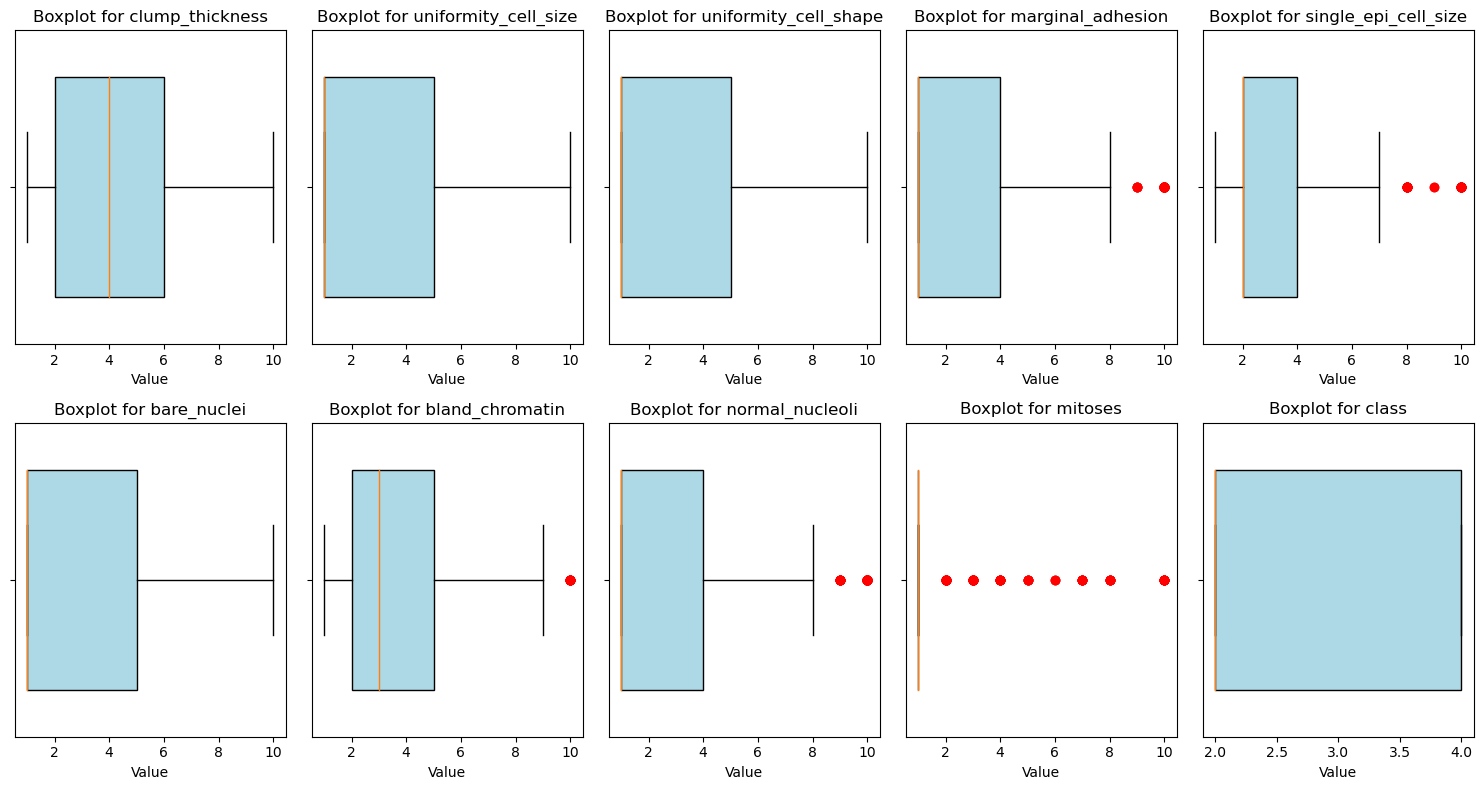

In [13]:
# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))

# Iterate through each numeric column and create boxplots with outliers highlighted
for i, column in enumerate(df_cleaned.columns):
    if df_cleaned[column].dtype in [np.int64, np.float64]:  # Check if the column is numeric
        ax = axes[i // 5, i % 5]
        ax.boxplot(df[column], vert=False, sym='ro', widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        ax.set_title(f'Boxplot for {column}')
        ax.set_xlabel('Value')
        ax.set_yticklabels([])  # Hide y-axis labels

plt.tight_layout()
plt.show()

In [14]:
# Create an empty dictionary to store results
outlier_info = {}

# Iterate through each numeric column and calculate IQR and outlier cutoffs
for column in df_cleaned.columns:
    if df_cleaned[column].dtype in [np.int64, np.float64]:  # Check if the column is numeric
        q1 = np.percentile(df_cleaned[column], 25)
        q3 = np.percentile(df_cleaned[column], 75)
        iqr = q3 - q1
        lower_cutoff = q1 - 1.5 * iqr
        upper_cutoff = q3 + 1.5 * iqr

        # Find the number of outliers
        outliers = df_cleaned.loc[(df_cleaned[column] < lower_cutoff) | (df_cleaned[column] > upper_cutoff)]
        num_outliers = len(outliers)

        # Replace outliers with NaN
        df_cleaned.loc[(df_cleaned[column] < lower_cutoff) | (df_cleaned[column] > upper_cutoff), column] = np.nan
        
        # Store the results in the dictionary
        outlier_info[column] = {
            'IQR': iqr,
            'Lower Cutoff': lower_cutoff,
            'Upper Cutoff': upper_cutoff,
            'Num Outliers': num_outliers
        }

df_dropNa = df_cleaned.dropna()
# Replace NaN values with the column's mean
df_cleaned_mean = df_cleaned.fillna(df_cleaned.mean())

# Display the DataFrame with outliers replaced by NaN and NaN values filled with column means
print(f"Data shape with changed outlier to NaN and dropped NaN:", df_dropNa.shape)
print(f"Data shap with changed outlier to mean values of its column:", df_cleaned_mean.shape)


Data shape with changed outlier to NaN and dropped NaN: (504, 10)
Data shap with changed outlier to mean values of its column: (699, 10)


In [15]:
# df_dropNa.hist(bins=20, figsize=(10, 10)) 

array([[<Axes: title={'center': 'clump_thickness'}>,
        <Axes: title={'center': 'uniformity_cell_size'}>,
        <Axes: title={'center': 'uniformity_cell_shape'}>],
       [<Axes: title={'center': 'marginal_adhesion'}>,
        <Axes: title={'center': 'single_epi_cell_size'}>,
        <Axes: title={'center': 'bare_nuclei'}>],
       [<Axes: title={'center': 'bland_chromatin'}>,
        <Axes: title={'center': 'normal_nucleoli'}>,
        <Axes: title={'center': 'mitoses'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

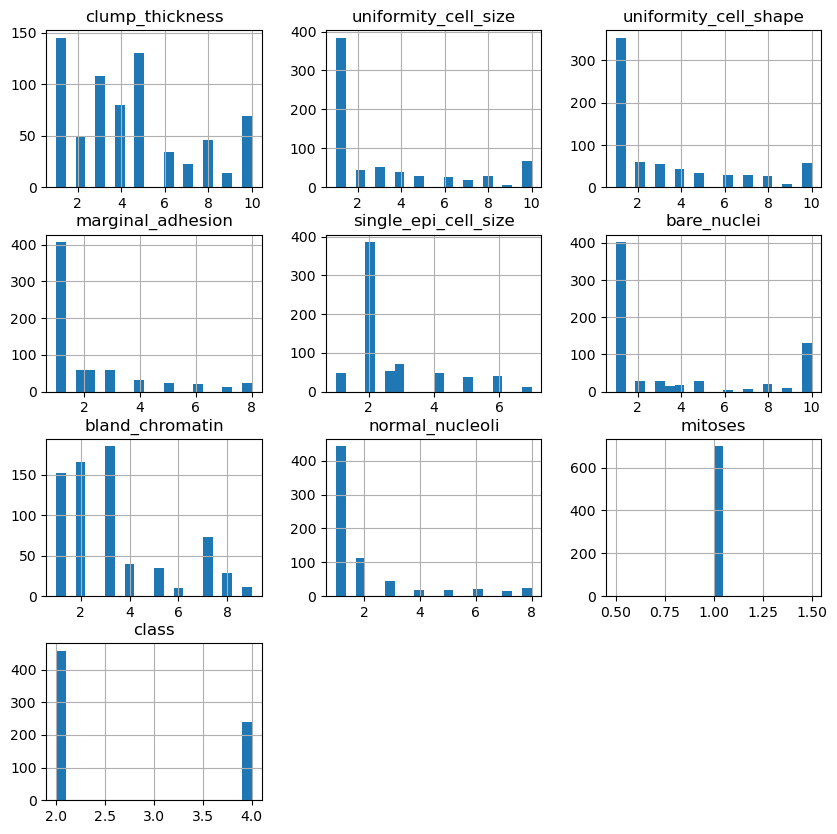

In [16]:
df_cleaned_mean.hist(bins=20, figsize=(10, 10)) 

# Feature Selection

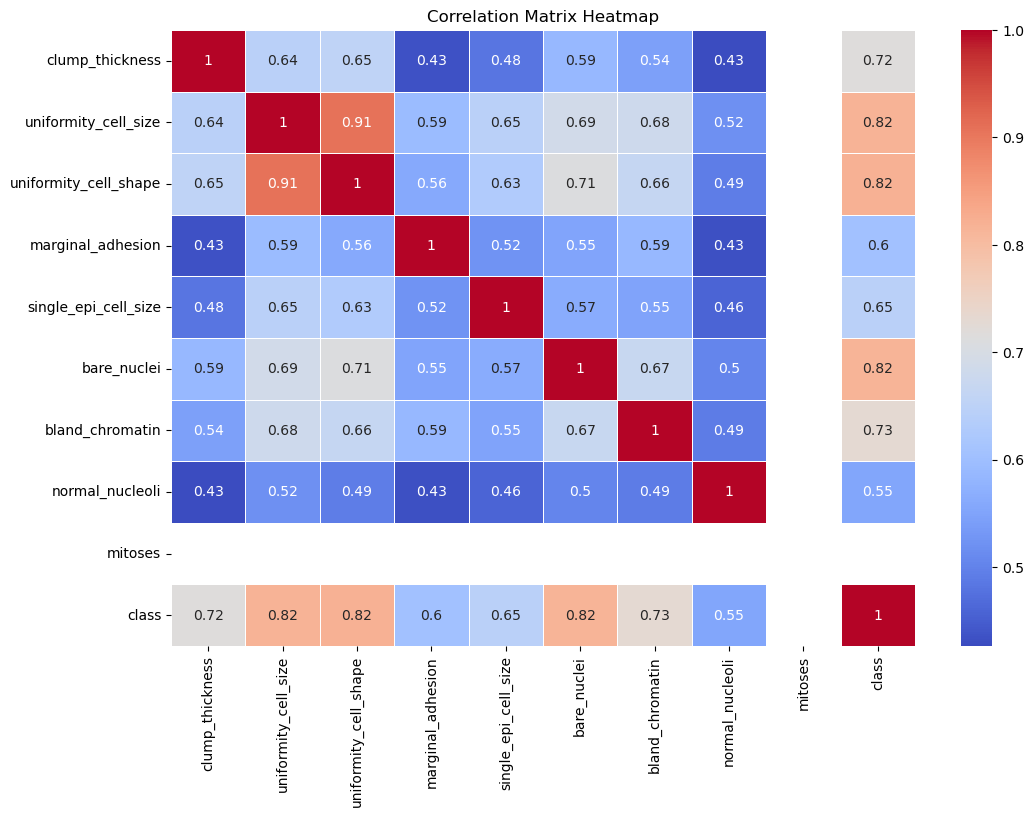

In [17]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned_mean.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add plot title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()

Correlation values for highly correlated features:
clump_thickness          0.716001
uniformity_cell_size     0.817904
uniformity_cell_shape    0.818934
bare_nuclei              0.816050
bland_chromatin          0.729908
class                    1.000000
Name: class, dtype: float64


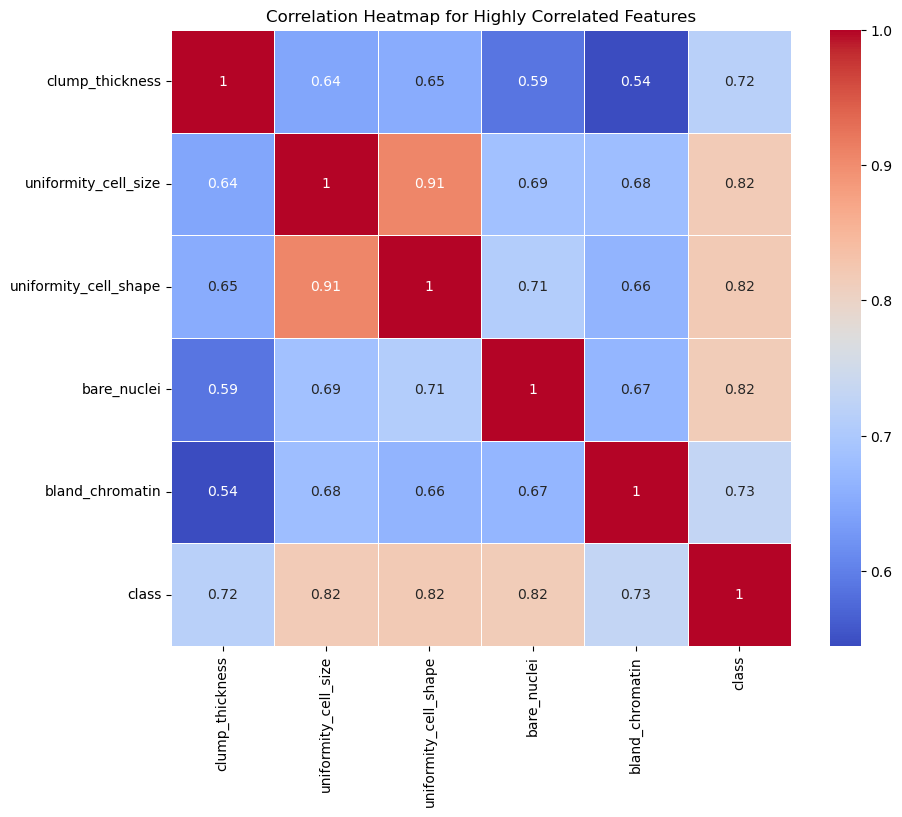

In [18]:
# We are selecting feature that had correlation over 0.70 with target feature 'class'.

target_variable = 'class'

# Calculate the correlation matrix
correlation_matrix = df_cleaned_mean.corr()

# Find features with a correlation above 0.70 with the 'class' variable
highly_correlated_features = correlation_matrix.index[abs(correlation_matrix['class']) > 0.70]

# Filter the correlation matrix for highly correlated features
highly_correlated_matrix = correlation_matrix.loc[highly_correlated_features, highly_correlated_features]

# Display correlation values
print("Correlation values for highly correlated features:")
print(correlation_matrix[target_variable][highly_correlated_features])

# Create a heatmap for highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Highly Correlated Features")
plt.show()

# Model Training:
 a. Logistic Regression
 b. KNN (k = 5)
 c. Linear SVM (kernel = linear)
 d. Kernel SVM (kernel = rbf)
 e. Naïve Bayes
 f. Decision Tree
 g. Random Forest (estimators = 10)
 f. XGBoost

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Check dataset prior
print(f"Dataset shape:",df_cleaned_mean.shape)
    
# Print the missing values summary after imputation
missing_values = df_cleaned_mean.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100
print(pd.DataFrame({'Data Type:': df_cleaned_mean.dtypes,'missing': missing_values, 'pc_missing': percentage_missing.round(2)}))

Dataset shape: (699, 10)
                      Data Type:  missing  pc_missing
clump_thickness          float64        0         0.0
uniformity_cell_size     float64        0         0.0
uniformity_cell_shape    float64        0         0.0
marginal_adhesion        float64        0         0.0
single_epi_cell_size     float64        0         0.0
bare_nuclei              float64        0         0.0
bland_chromatin          float64        0         0.0
normal_nucleoli          float64        0         0.0
mitoses                  float64        0         0.0
class                    float64        0         0.0


In [28]:
# Features based on correlation selection
selected_features = ['clump_thickness','uniformity_cell_size', 'uniformity_cell_shape', 'bare_nuclei', 'bland_chromatin', 'class']

# Split the data into features (X) and target variable (y)
X = df_cleaned_mean[selected_features].drop(columns=['class'], axis=1)
y = df_cleaned_mean['class']

# Convert class labels to 0 (benign) and 1 (malignant)
y = y.replace({2: 0, 4: 1})

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train each model
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Linear SVM': SVC(kernel='linear'),
    'Kernel SVM (RBF)': SVC(kernel='rbf'),
    'Naïve Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest (estimators=10)': RandomForestClassifier(n_estimators=10),
    'XGBoost': XGBClassifier()
}


In [29]:
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': confusion,
        'Classification Report': classification_rep
    }

# Display results including classification reports
print("Model\t\t\tAccuracy")
print("-" * 40)
for model_name, result in results.items():
    print(f"{model_name}\t\t{result['Accuracy']:.4f}")
    print(f"Classification Report for {model_name}:\n")
    print(result['Classification Report'])
    print("\n" + "-" * 40)

# Display the confusion matrices:
for model_name, result in results.items():
    print(f"\nConfusion Matrix for {model_name}:\n")
    print(result['Confusion Matrix'])
    print("-" * 40)

Model			Accuracy
----------------------------------------
Logistic Regression		0.9657
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97       118
   Malignant       0.98      0.91      0.95        57

    accuracy                           0.97       175
   macro avg       0.97      0.95      0.96       175
weighted avg       0.97      0.97      0.97       175


----------------------------------------
KNN (k=5)		0.9486
Classification Report for KNN (k=5):

              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96       118
   Malignant       0.94      0.89      0.92        57

    accuracy                           0.95       175
   macro avg       0.95      0.93      0.94       175
weighted avg       0.95      0.95      0.95       175


----------------------------------------
Linear SVM		0.9600
Classification Report for Linear SVM:

              

In [24]:
# # Jus the report of of accuracy and confusion matrix:

# results = {}

# for model_name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     confusion = confusion_matrix(y_test, y_pred)
#     results[model_name] = {
#         'Accuracy': accuracy,
#         'Confusion Matrix': confusion
#     }

# # Display results in a table
# print("Model\t\t\tAccuracy")
# print("-" * 40)
# for model_name, result in results.items():
#     print(f"{model_name}\t\t{result['Accuracy']:.4f}")

# # Display the confusion matrices:
# for model_name, result in results.items():
#     print(f"\nConfusion Matrix for {model_name}:\n")
#     print(result['Confusion Matrix'])
#     print("-" * 40)


THANKS!